In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (v : trial_type)
#### Load data and check data head
##### Use Control.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataCon = hddm.load_csv('./rt_dataframes/control.csv')
dataCon.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataCon = dataCon.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataCon['rt'] = dataCon['rt']/1000
dataCon.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


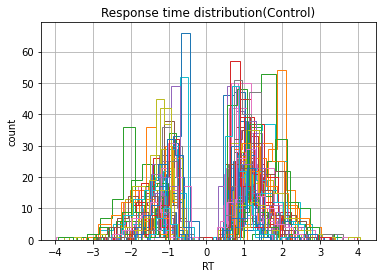

In [4]:
#flip the error RTs to be negative
dataCon = hddm.utils.flip_errors(dataCon)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Control)')
for i, subj_data in dataCon.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/rt_distribution(con).png')

## Fitting the hierarchical model for one condition with no subject effects for Control participants

In [5]:
m = hddm.HDDM(dataCon,depends_on={'v': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(separate)/traces(2CCon_v)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(separate)/model(2CCon_v)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3000 of 3000 complete in 1058.1 sec

Plotting a
Plotting a_std
Plotting v(101)
Plotting v(102)
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


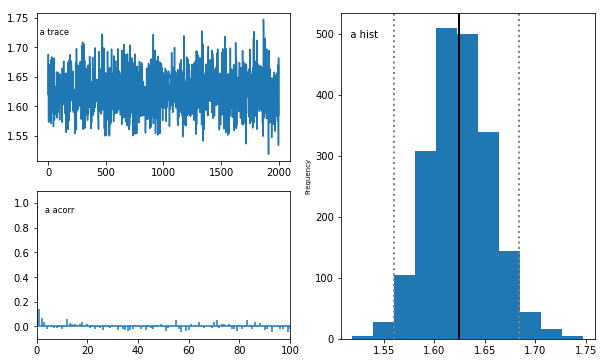

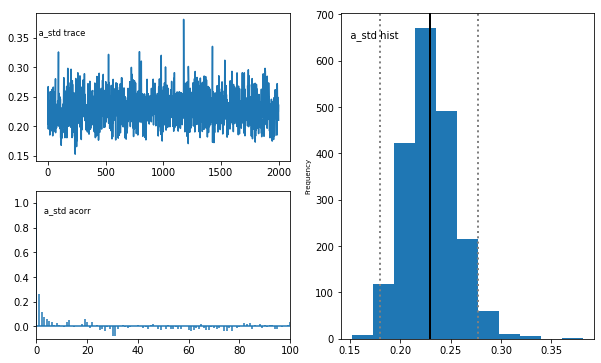

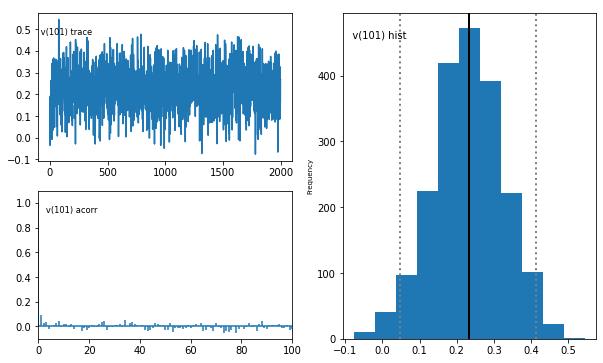

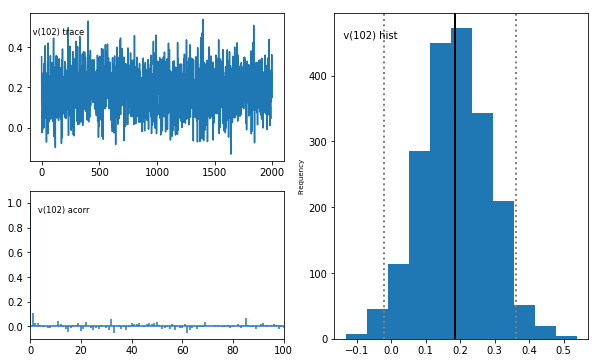

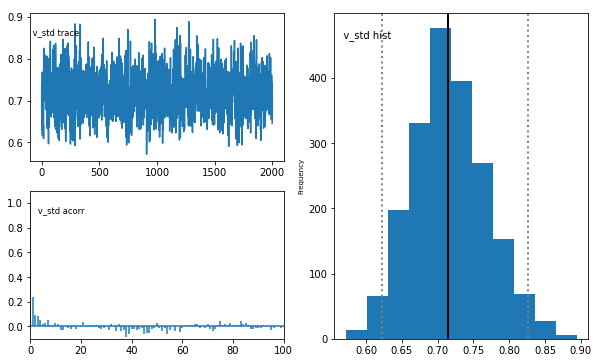

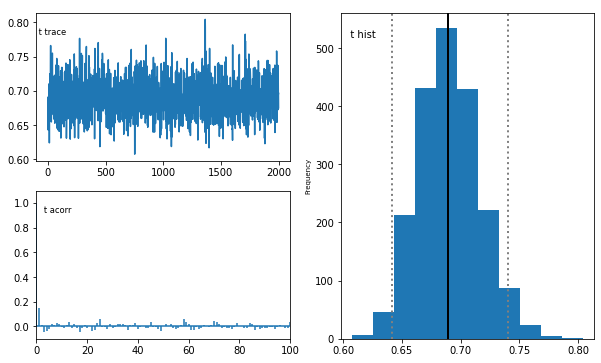

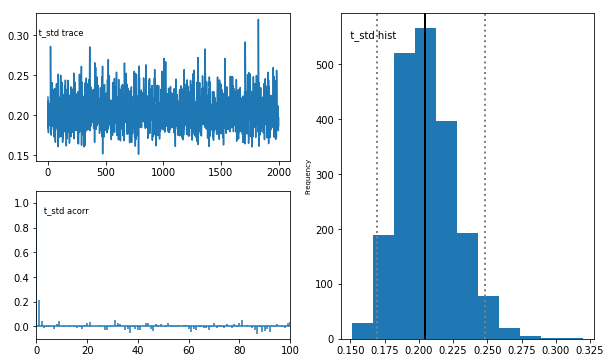

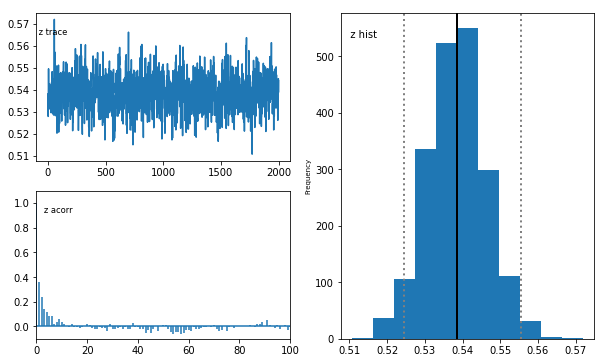

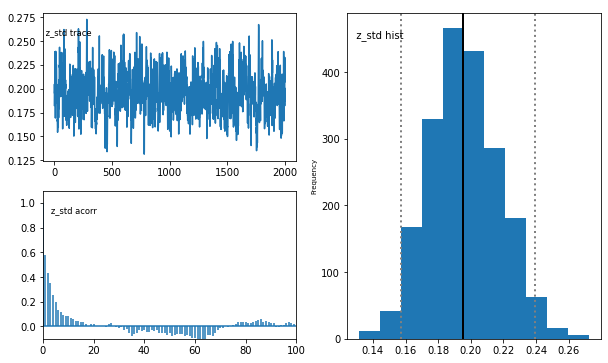

In [6]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [7]:
stats2Cv = m.gen_stats()
stats2Cv.to_csv('./fitting_results/HDDM/HDDM2C(separate)/HDDM2CCon_v.csv', sep=',')
stats2Cv[stats2Cv.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.62557,0.0311707,1.56477,1.60512,1.62479,1.64619,1.69153,0.000856685
a_std,0.230595,0.0251476,0.183504,0.213733,0.229334,0.245908,0.28244,0.0008055
v_std,0.716628,0.0517774,0.622422,0.680464,0.713979,0.750201,0.827515,0.00170511
t,0.690259,0.0261131,0.64292,0.67204,0.689378,0.707404,0.742869,0.000662283
t_std,0.20605,0.0208501,0.170682,0.191027,0.204141,0.218491,0.251117,0.000575539
z,0.538516,0.00781782,0.522932,0.533429,0.538516,0.543537,0.554444,0.000300737
z_std,0.196107,0.0217181,0.156641,0.181137,0.195215,0.210461,0.238849,0.001129


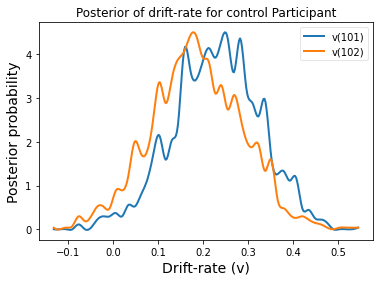

In [8]:
v_101, v_102 = m.nodes_db.node[['v(101)', 'v(102)']]
hddm.analyze.plot_posterior_nodes([v_101, v_102])
plt.xlabel('Drift-rate (v)', fontsize=14)
plt.ylabel('Posterior probability', fontsize=14)
plt.title('Posterior of drift-rate for control Participant', fontsize=12)
plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/posterior_vCon(101,102).png')

In [9]:
m.dic

16300.462673731041

## Check for model convergence

In [10]:
# Set up models list to append results
models = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(separate)/chain2Cv_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(separate)/chain2CvCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(dataCon,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0
Fitting chain 1
Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------96%----------------  ] 2884 of 3000 complete in 565.8 sec               0%                  ] 4 of 3000 complete in 0.6 sec [                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 4 of 3000 complete in 0.6 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 7 of 3000 complete in 1.1 sec[                  0%                  ] 10 of 3000 complete in 1.6 sec  [                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[                  0%                  ] 10 of 3000 complete in 1.7 sec[          

In [13]:
models

In [14]:
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0002211914079995
a_std: 1.0010765596143187
a_subj.02535fcf7e16bb56: 1.012002420743006
a_subj.09ba82a2ca814481: 1.0002151536374377
a_subj.0abfc32a4d12c731: 1.0005050928173953
a_subj.0b0a94c202d0b233: 1.0005951819567505
a_subj.0d894551bc966608: 1.0022754384689314
a_subj.15e0c065b2c11595: 0.9999408903476564
a_subj.163b12703c8e5c3c: 1.000549228919465
a_subj.1bf86ff948486447: 1.000335247533072
a_subj.1cb976bac3a2016b: 1.0001494802006436
a_subj.22d84796012679e8: 0.9999907265843396
a_subj.247384e4eccc4f80: 1.0000915627442566
a_subj.27902f23b60a7b76: 1.0000325784754724
a_subj.296a71628065dfa8: 1.0332684632311508
a_subj.371fb6652968f25f: 1.0003165039741642
a_subj.3ddf191ed8c33c57: 1.0003282198429546
a_subj.414f1040212a659b: 1.0000738153575286
a_subj.46fd6e0b3b5c1df3: 1.0003605316722322
a_subj.4866612e834a9f5a: 1.000317754707335
a_subj.4a43f99c56b2a634: 1.0008744918660515
a_subj.4e3de1ed1c0d6103: 0.9999692484363822
a_subj.5497867d4afb5993: 1.0001099033704761
a_subj.582ab220066afebc: 0.99976

In [15]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


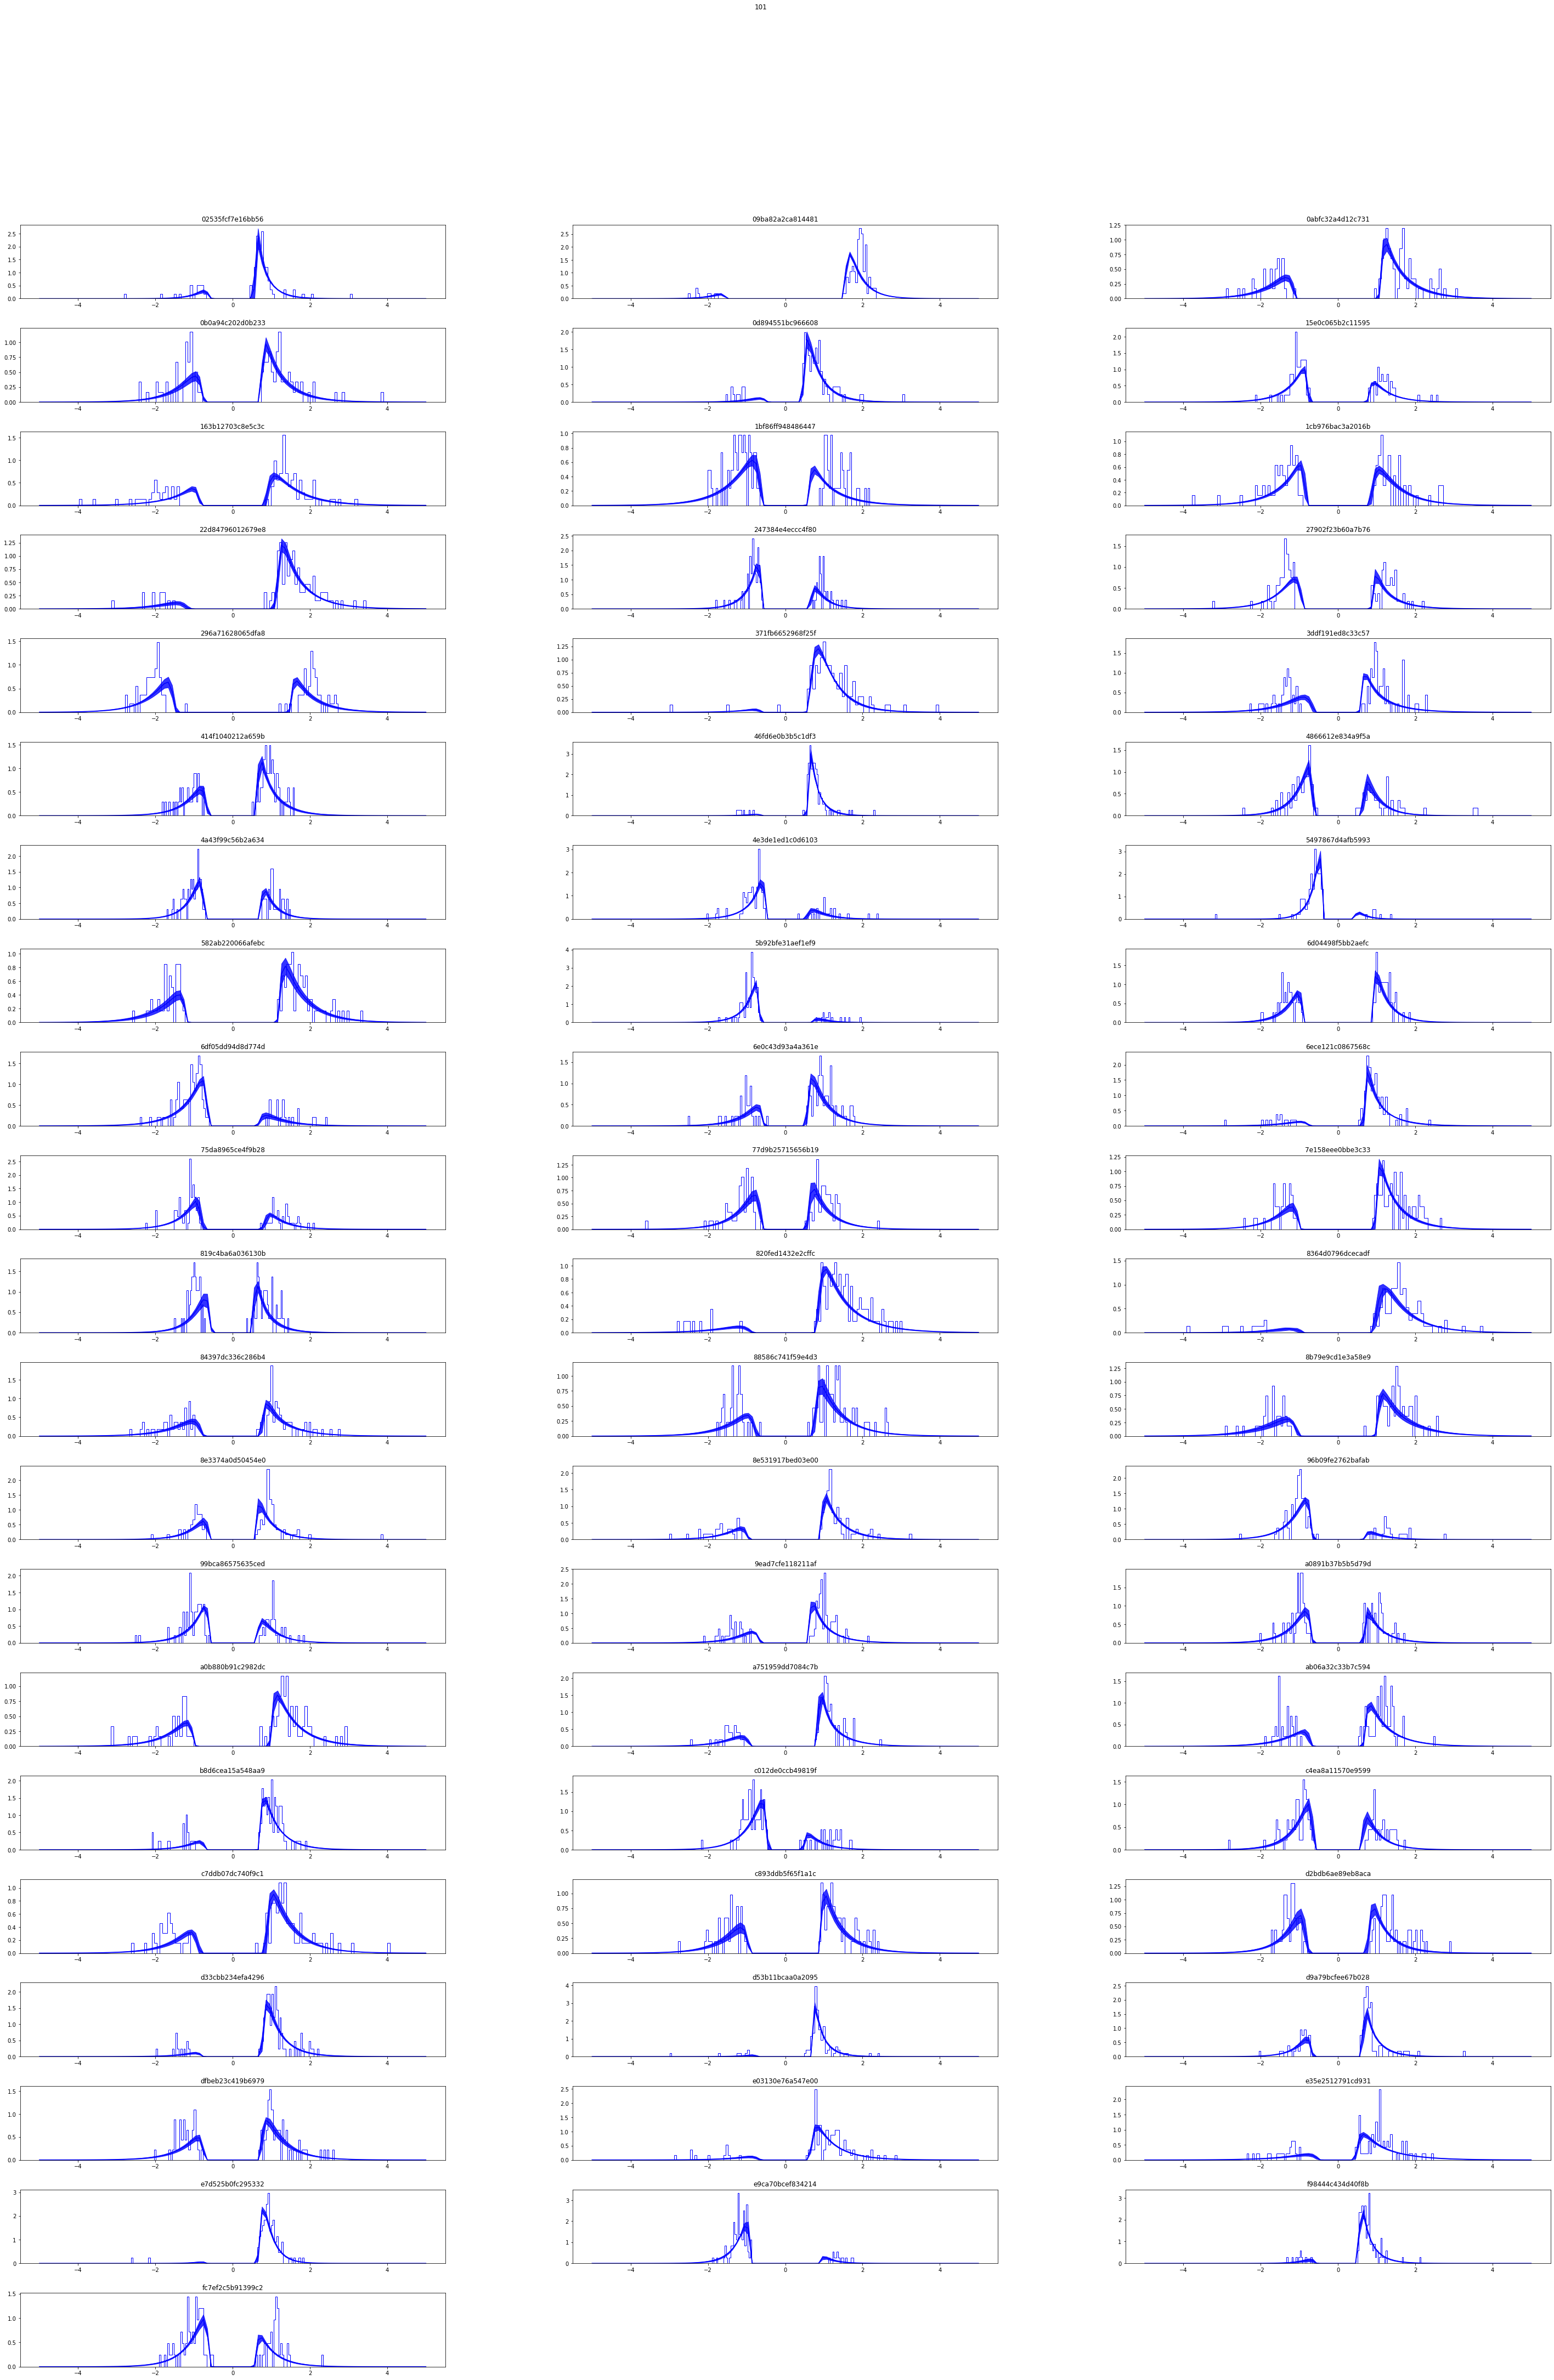

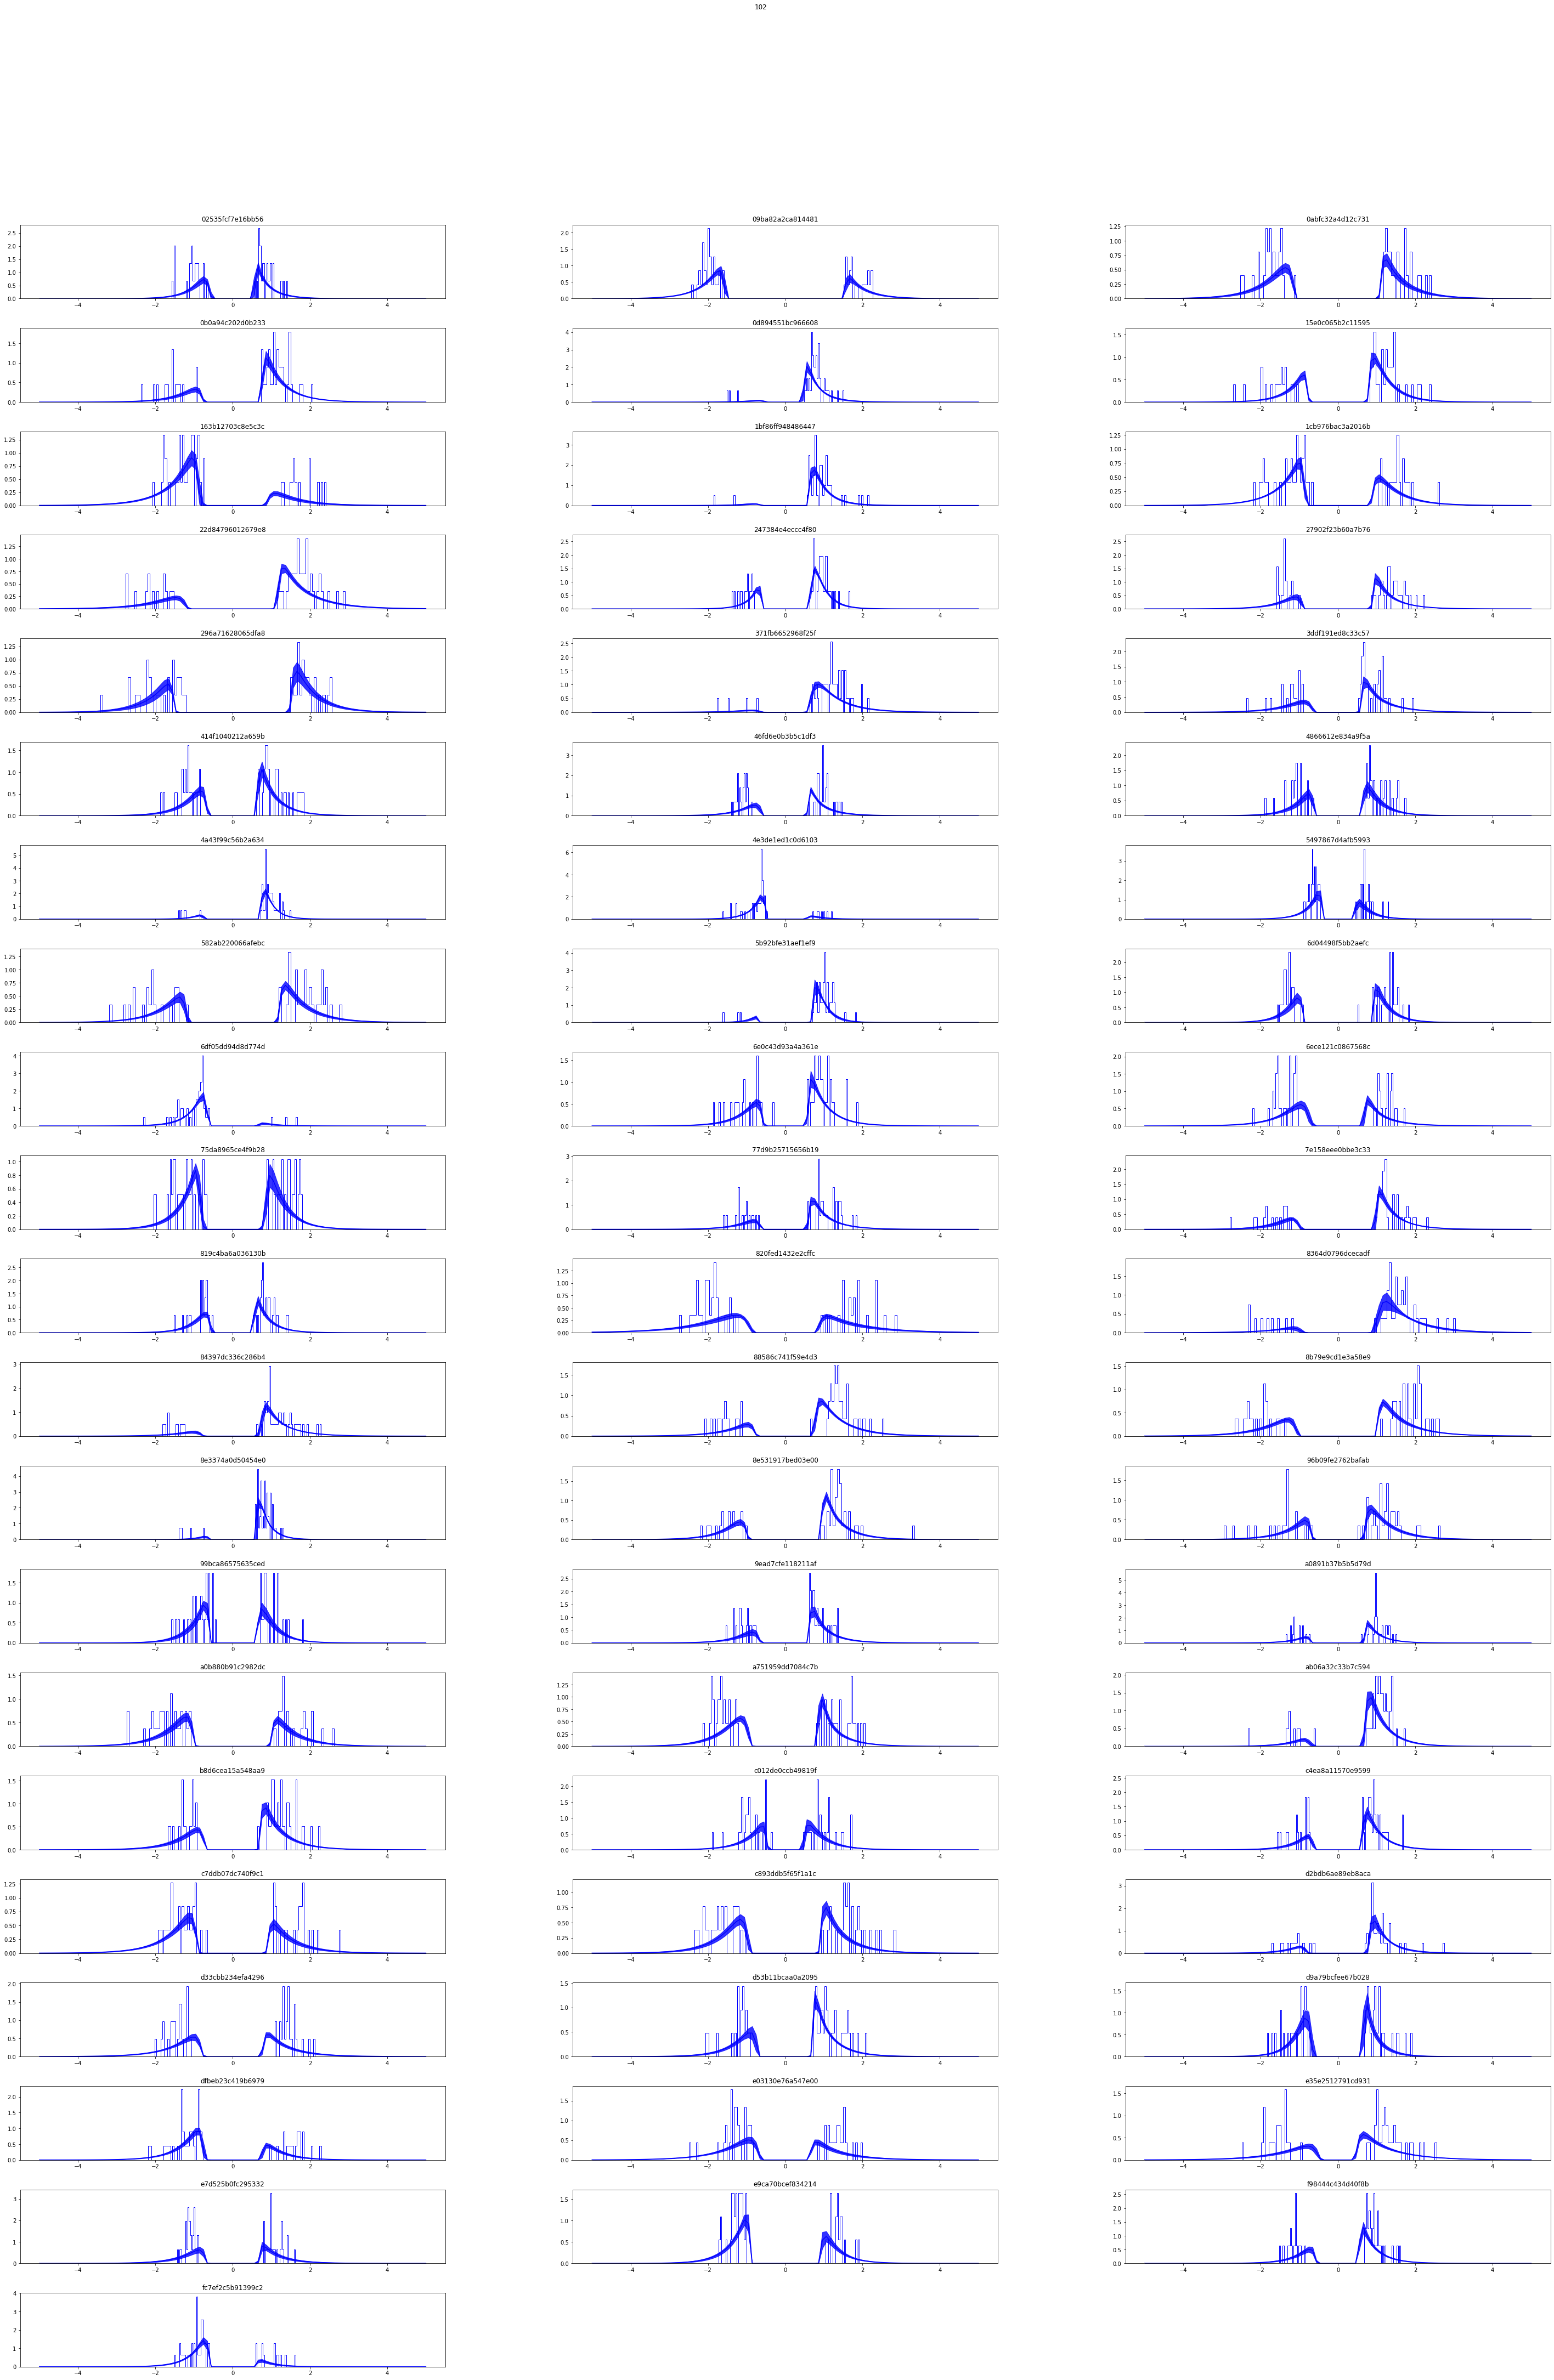

In [16]:
m.plot_posterior_predictive(figsize=(50, 70))